In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN

In [52]:
X = np.array([[0,1],[0,2],[1,1],[1,2],[2,0],[2,1],[3,0],[4,0],[5,1],[5,2]])
#X = np.array([[1,1],[2,1],[2,3],[3,2],[4,3],[5,5]])

In [54]:
Kmeans = KMeans(n_clusters=2, random_state=42)
Kmedoids = KMedoids(n_clusters=2, random_state=42)
dbs = DBSCAN(eps=3, min_samples=2)

In [55]:
Kmeans.fit(X)
Kmedoids.fit(X)
dbs.fit(X)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBSCAN(eps=3, min_samples=2)

Text(0.5, 1.0, 'Points sur le repère')

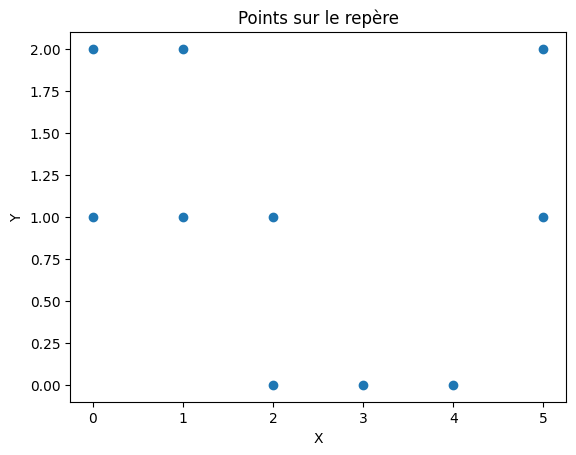

In [56]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Points sur le repère')

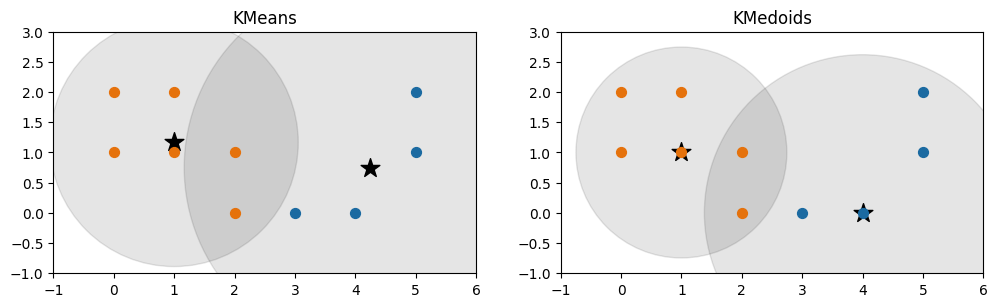

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que X, Kmeans et Kmedoids soient définis précédemment

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns of subplots

for i, estimator in enumerate([Kmeans, Kmedoids]):
    ax = axs[i]
    ax.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], s=200, marker='*', c='black')
    for j in range(estimator.n_clusters):
        mask = estimator.labels_ == j
        ax.scatter(X[mask, 0], X[mask, 1], s=50)
        circle = plt.Circle(estimator.cluster_centers_[j], estimator.inertia_ / len(X[mask]), color='black', alpha=0.1)
        ax.add_artist(circle)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 3)
    ax.set_aspect('equal')
    ax.set_title(f'{estimator.__class__.__name__}')

plt.show()  # Affiche les graphiques


C:\Users\HP\AppData\Local\Temp\ipykernel_14752\2030733378.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[labels == label, 0], X[labels == label, 1], s=50, c=color)


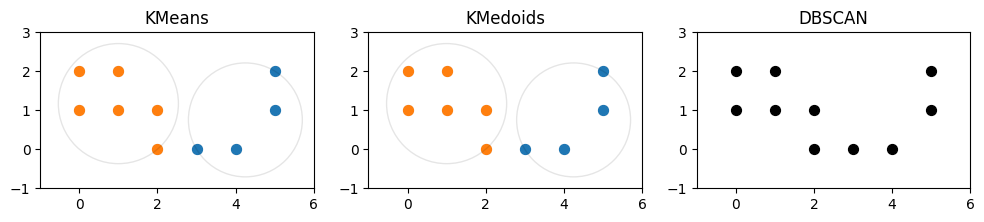

In [64]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
import numpy as np

# Supposons que X, km, kmd, et dbs soient définis précédemment

# Créer une figure avec 1 ligne et 3 colonnes de sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Liste des estimateurs (km, kmd, dbs)
estimators = [Kmeans, Kmedoids, dbs]

for i, estimator in enumerate(estimators):
    ax = axs[i]
    
    if isinstance(estimator, DBSCAN):
        # Pour DBSCAN, nous n'avons pas de centroïdes, alors nous utilisons directement les labels
        labels = estimator.labels_
        unique_labels = set(labels)
        for label in unique_labels:
            if label == -1:
                # Points de bruit en noir
                color = 'black'
            else:
                color = plt.cm.nipy_spectral(float(label) / len(unique_labels))
            
            ax.scatter(X[labels == label, 0], X[labels == label, 1], s=50, c=color)
    else:
        # Tracer les points de données associés à chaque cluster
        ax.scatter(X[:, 0], X[:, 1], s=50, c='lightgray')  # Points de données en gris clair
        
        for j in range(estimator.n_clusters):
            mask = estimator.labels_ == j
            
            # Tracer les points de données associés à chaque cluster
            ax.scatter(X[mask, 0], X[mask, 1], s=50)
            
            # Calculer le cercle englobant autour des points du cluster
            cluster_center = np.mean(X[mask], axis=0)
            radius = np.max(np.linalg.norm(X[mask] - cluster_center, axis=1))
            circle = plt.Circle(cluster_center, radius, color='black', alpha=0.1, fill=False)
            ax.add_patch(circle)
    
    # Définir les limites et l'aspect du sous-graphique
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 3)
    ax.set_aspect('equal')
    
    # Définir le titre du sous-graphique en utilisant le nom de la classe de l'estimateur
    ax.set_title(estimator.__class__.__name__)

# Afficher les graphiques
plt.show()